In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot


In [2]:
files =[file for file in os.listdir("D:\projects\Sales data")]
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
path = "D:\projects\Sales data"

#blank dataframe
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(934250, 6)

In [4]:
all_data.to_csv('D+:\projects\Sales data/all_data.csv',index=False)

In [5]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_data.isnull().sum()

Order ID            2725
Product             2725
Quantity Ordered    2725
Price Each          2725
Order Date          2725
Purchase Address    2725
dtype: int64

In [8]:
all_data = all_data.dropna(how='all')
all_data.shape


(931525, 6)

In [9]:
'04/19/19 08:46'.split('/')[0]  #month


'04'

In [10]:
'04/19/19 08:46'.split('/')[1]    #date 

'19'

In [48]:
def month(x):
    return x.split('/')[0]

In [85]:
def date(x):
    return x.split('/')[1]

In [86]:
all_data['Month']=all_data['Order Date'].apply(month)

In [87]:
all_data['Date']=all_data['Order Date'].apply(date)   # date

In [88]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
sales               float64
city                 object
Date                 object
dtype: object

In [89]:
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [90]:
all_data['Date'].unique()

array(['19', '07', '12', '30', '29', '02', '24', '08', '18', '15', '16',
       '22', '04', '27', '03', '28', '09', '11', '05', '20', '10', '21',
       '17', '01', '26', '25', '13', '14', '23', '06', '31'], dtype=object)

In [91]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter])

929750

In [92]:
filter=all_data['Date']=='Order Date'
len(all_data[~filter])

929750

In [93]:
all_data=all_data[~filter]
all_data.shape

(929750, 10)

In [94]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,07
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,12
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,12
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,30


In [95]:
all_data['Month']=all_data['Month'].astype(int)

In [96]:
all_data['Date']=all_data['Date'].astype(int)

In [97]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
sales               float64
city                 object
Date                  int32
dtype: object

In [98]:
all_data['Price Each']=all_data['Price Each'].astype(float)

In [99]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [100]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,7
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,12
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,12
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,30


In [101]:
all_data.groupby('Month')['sales'].sum()

Month
1      9111283.65
2     11010112.10
3     14035501.90
4     16953351.20
5     15763033.75
6     12889011.30
7     13238878.80
8     11222339.40
9     10487800.65
10    18683634.40
11    15998016.00
12    23067216.70
Name: sales, dtype: float64

In [102]:
all_data.groupby('Date')['sales'].sum()

Date
1     5831596.25
2     5687285.20
3     5372164.50
4     5819288.60
5     5676423.65
6     5759780.45
7     5473983.15
8     5539817.45
9     5846252.15
10    5845543.65
11    5839792.45
12    5545670.90
13    5686962.70
14    5669548.30
15    5581708.75
16    5497029.40
17    5696539.95
18    5820157.75
19    5495354.90
20    5721877.35
21    5610070.70
22    5699596.45
23    5448197.20
24    5611137.85
25    5844092.95
26    5702216.45
27    5641715.95
28    5601648.25
29    5419993.80
30    5198962.20
31    3275770.55
Name: sales, dtype: float64

In [103]:
all_data.groupby('Date')['Quantity Ordered'].sum()

Date
1     34335
2     34810
3     32670
4     34065
5     34080
6     33890
7     33895
8     34120
9     34180
10    34825
11    33800
12    34615
13    35560
14    34535
15    33990
16    34485
17    34860
18    34230
19    35045
20    34615
21    34320
22    34435
23    34075
24    34565
25    34020
26    35090
27    34155
28    34325
29    32115
30    31600
31    20090
Name: Quantity Ordered, dtype: int32

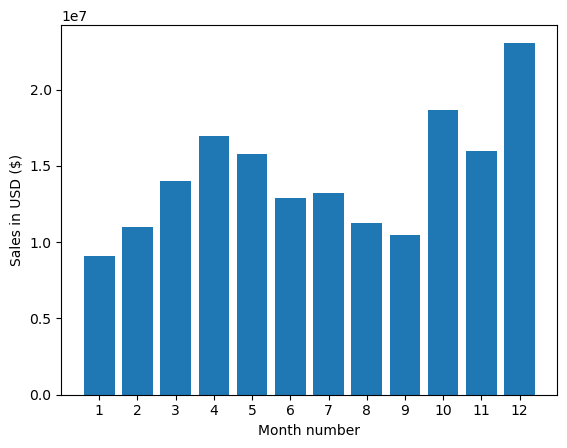

In [104]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

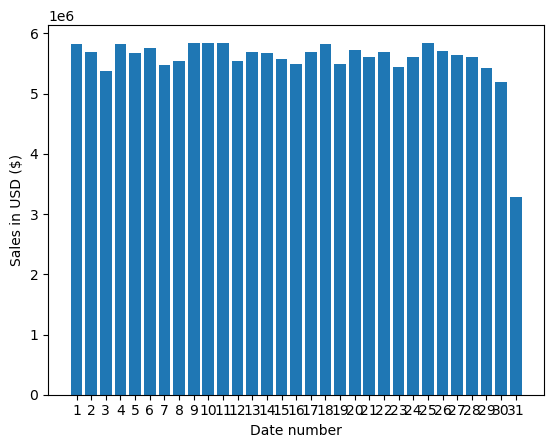

In [105]:
date=range(1,32)
plt.bar(date,all_data.groupby('Date')['sales'].sum())
plt.xticks(date)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Date number')
plt.show()

<AxesSubplot:xlabel='Product'>

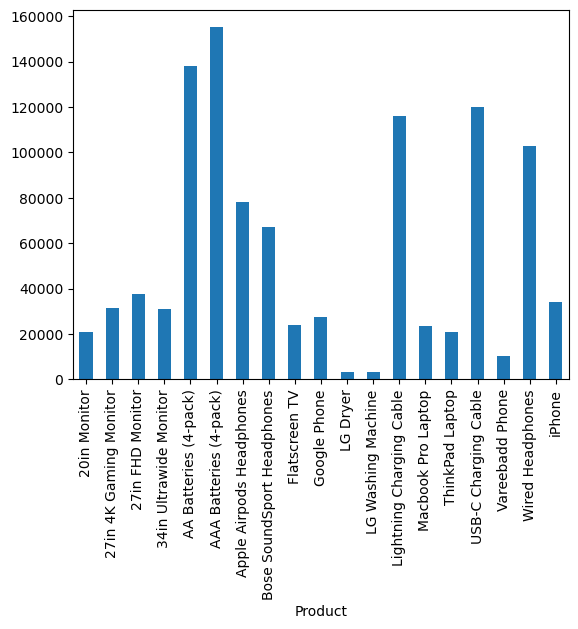

In [106]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [107]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,7
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,12
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,12
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,30
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,29
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle,2
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,12
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco,24
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston,8


In [108]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [109]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Date,Grouped
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,19,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,7,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,12,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,12,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,30,"Wired Headphones,Wired Headphones,Wired Headph..."


In [110]:
df.shape

(929750, 11)

In [111]:
#lets drop out all duplicate Order ID
df2 = df.drop_duplicates(subset=['Order ID'])

<AxesSubplot:ylabel='Grouped'>

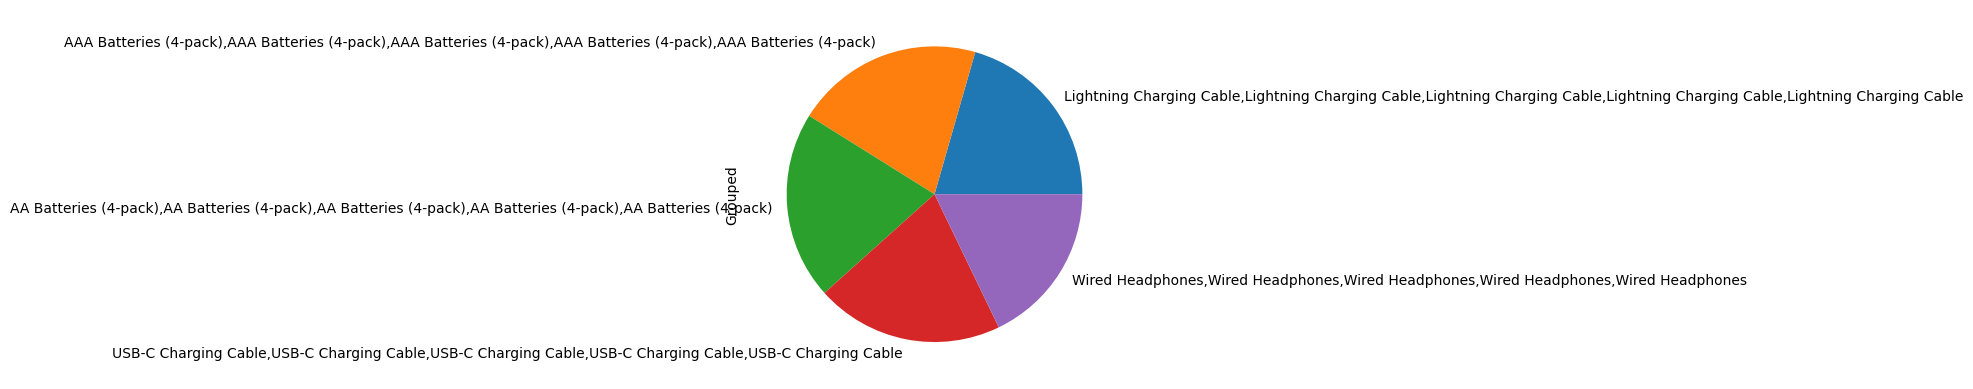

In [112]:
df2['Grouped'].value_counts()[0:5].plot.pie()

In [113]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [114]:
def city(x):
    return x.split(',')[1]

In [115]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [116]:
all_data.groupby('city')['city'].count()

city
 Atlanta           74405
 Austin            49525
 Boston            99670
 Dallas            74100
 Los Angeles      148025
 New York City    124380
 Portland          62325
 San Francisco    223660
 Seattle           73660
Name: city, dtype: int64

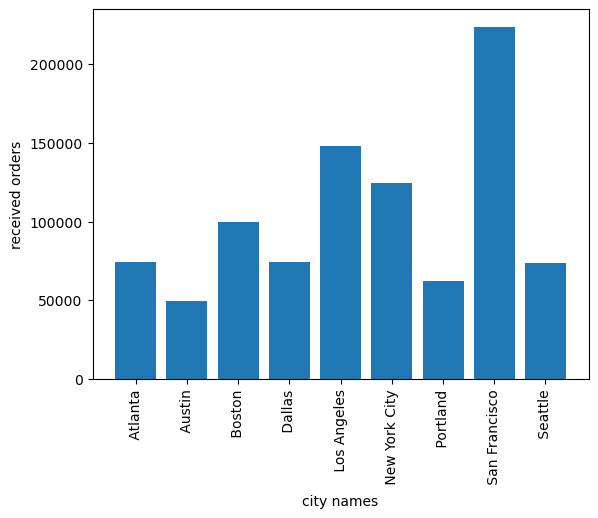

In [117]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()